# Word Cloud
kita akan menggunakan data novel alice in wonderland untuk membuat word cloud

In [1]:
!pip install wordcloud

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image

from wordcloud import WordCloud, STOPWORDS

In [3]:
# load data nya

# download file and save as alice_novel.txt
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

In [4]:
url = './alice_novel.txt'

f = open(url, "r")

alice_novel = f.read()

# print 1000 karakter pertama
print(alice_novel[:1000])

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictur


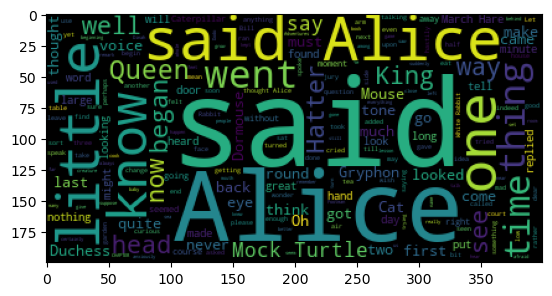

In [5]:
# membuat wordcloud

# Word Cloud kosong
wc = WordCloud() 

# isi dengan text
wc.generate(alice_novel) 

# tampilkan
plt.imshow(wc)

kita rapikan wordcloud dengan:
- menghapus stopwords, seperti "said", "and", dan kata2 yang bukan kata benda atau kata kerja
- hapus axis
- ganti warna
- ganti bentuk
- me limit jumlah kata2 yang muncul di word cloud

In [6]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [7]:
# kita bisa tambahin juga stopwords yang kita tidak mau
STOPWORDS.add("said")

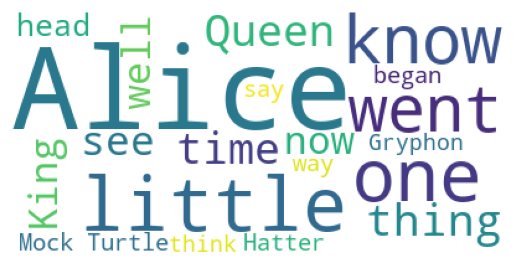

In [13]:
# membuat Word Cloud
wc = WordCloud(
    stopwords=STOPWORDS,        # exclude kata2 tertentu
    background_color="white",   # ganti warna background
    max_words=20                # limit jumlah kata yang muncul
) 

wc.generate(alice_novel) 
plt.imshow(wc)
plt.axis("off") # hapus axis
plt.show()

dengan membuat figure, kita juga bisa mengatur ukuran wordcloud.

berikutnya kita akan coba:
- mengatur ukuran wordcloud
- mengatur bentuk wordcloud

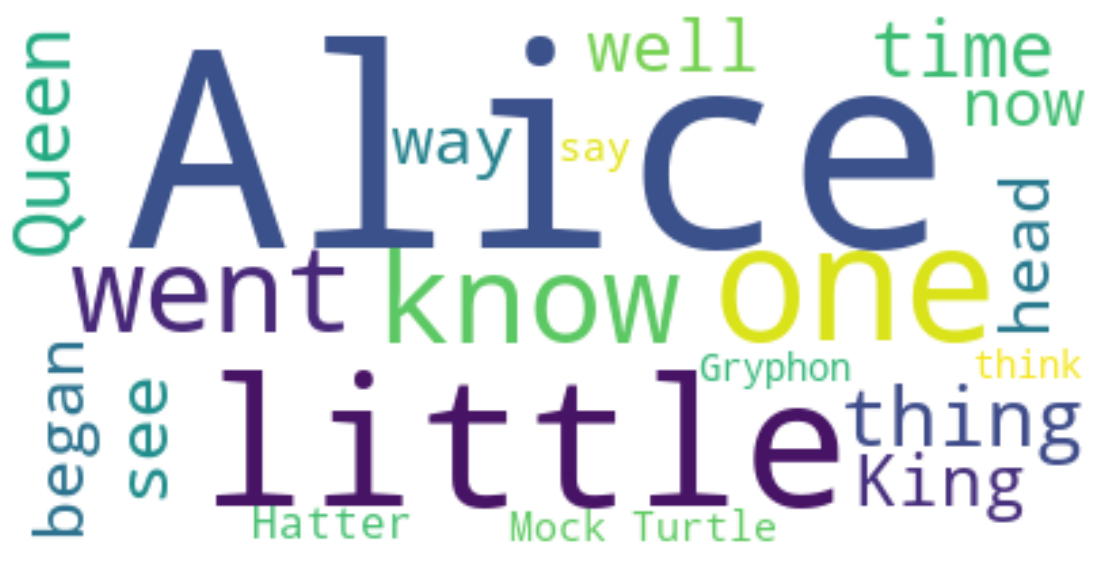

In [18]:
# membuat Word Cloud
wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=20
) 

wc.generate(alice_novel) 

# set figure
fig = plt.figure()
fig.set_figwidth(14)    # set lebar
fig.set_figheight(18)   # set tinggi

# interpolation digunakan untuk menghaluskan edges gambar https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

kita download dulu bentuk wordcloud yang diinginkan (masking image nya) lalu kita gunakan untuk mengubah bentuk word cloud.

untuk contoh kali ini, kita bisa gunakan gambar alice dan kelincinya dari https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png

In [19]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png -O alice_mask.png

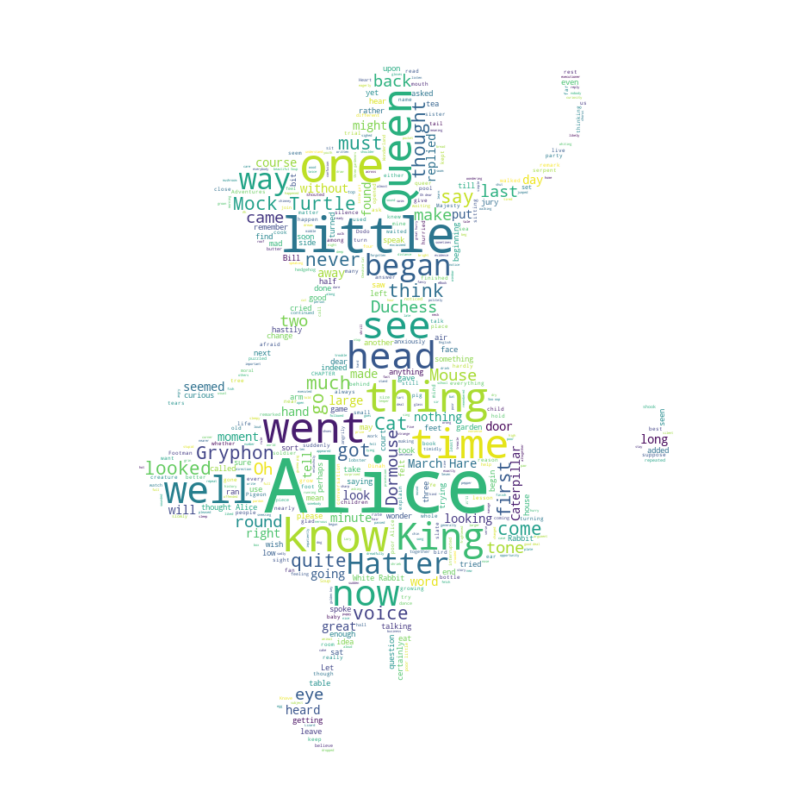

In [25]:
# membuat Word Cloud

# gambar masknya diubah jadi sebuah numpy array, setelah gambar dibuka menggunakan package Image dari PIL
alice_mask = np.array(Image.open('alice_mask.png'))

wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=2000,
    mask=alice_mask             # set bentuk wordcloud nya dengan opsi mask
) 

wc.generate(alice_novel) 

# set figure
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Membuat WordCloud dengan data tabular
1. kita bisa pilih mau kategori apa saja dari data tabular kita yang mau ikutan masuk ke wordcloud
2. untuk setiap kategori kita hitung total/ proporsinya, untuk tau dia mau muncul berapa kali
3. kita buat sebuah text, dimana masing2 kategori muncul berapa kali, sesuai total/ proporsinya
4. generate wordcloud dari data text

In [26]:
# contoh dengan data imigrasi canada
# import data
df_can = pd.read_excel('../dataset/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_can = df_can.rename(columns={
                       'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region', 'DevName': 'Dev'})
df_can = df_can.set_index('Country')

df_can.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [30]:
# buat word cloud dengan data country
# semua country kita ikutkan
# kita mau buat wordcloud untuk data total imigran dari tahun 2000-2010

years = range(2000,2011)
df_2000_2010 = df_can[years]

df_2000_2010["Total"] = df_2000_2010.sum(axis=1)
df_2000_2010 = df_2000_2010[["Total"]]

total_immigrants = df_2000_2010["Total"].sum()
df_2000_2010["Proporsi"] = df_2000_2010["Total"] / total_immigrants

df_2000_2010

C:\Users\stefa\AppData\Local\Temp\ipykernel_17316\2402355710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_2010["Total"] = df_2000_2010.sum(axis=1)


,Total,Proporsi
Country,,
Afghanistan,32259,1.223073e-02
Albania,11360,4.307050e-03
Algeria,42585,1.614575e-02
American Samoa,1,3.791417e-07
Andorra,5,1.895709e-06
...,...,...
Viet Nam,23216,8.802155e-03
Western Sahara,1,3.791417e-07
Yemen,1606,6.089016e-04


In [31]:
total_immigrants

2637536

In [35]:
len(alice_novel)

145190

kenapa perlu pakai proporsi?

karena jumlah kata yang mau kita buat sangat banyak, ada 2,637,536 total imigran, berarti text yang mau kita generate tanpa menggunakan proporsi adalah nama negara * 2.6 juta ==> membuat sebuah text yang sangat besar.

sebagai pembanding, novel alice tadi punya 145,190 karakter.

kalau nama negara misalkan "Indonesia" punya 9 karakter, berarti menggunakan data Total itu akan membuat text file dengan minimal 23.4 juta karakter.

untuk membuat word cloud kita tidak perlu data sebanyak itu, gak bakal kelihatan juga. Jadi kita bisa membuat proporsi, membuat limit total huruf dalam text file kita, sebelum dijadikan word cloud. misalnya limitnya 20000 kata, jadi akan ada sekitar 180000 karakter.

In [41]:
canada_2000_2010_textfile = ""

limit_words = 20000

for country in df_2000_2010.index:
    total_count = round(df_2000_2010.loc[country, "Proporsi"] * limit_words)

    nama_negara = country
    # hapus spasi dan gantikan dengan _
    nama_negara = nama_negara.replace(" ","_")
    # hapus juga ()', dan gantikan dengan _
    nama_negara = nama_negara.replace("(","_")
    nama_negara = nama_negara.replace(")","_")
    nama_negara = nama_negara.replace("'","_")
    nama_negara = nama_negara.replace(",","_")

    # dengan begini, kita memastika 1 negara 1 huruf (word) bukan banyak

    canada_2000_2010_textfile += (nama_negara + " ") * total_count

canada_2000_2010_textfile

'Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afg

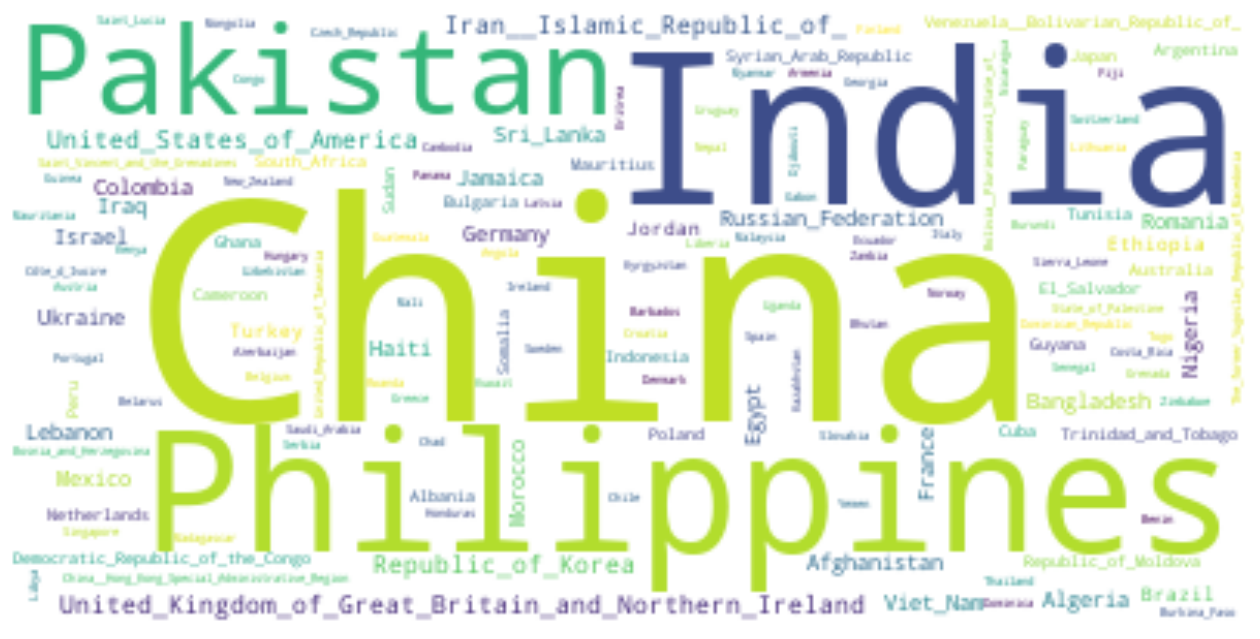

In [44]:
# membuat Word Cloud
wc = WordCloud(
    background_color="white",
    max_words=2000,
    collocations=False
)

wc.generate(canada_2000_2010_textfile) 

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(16)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

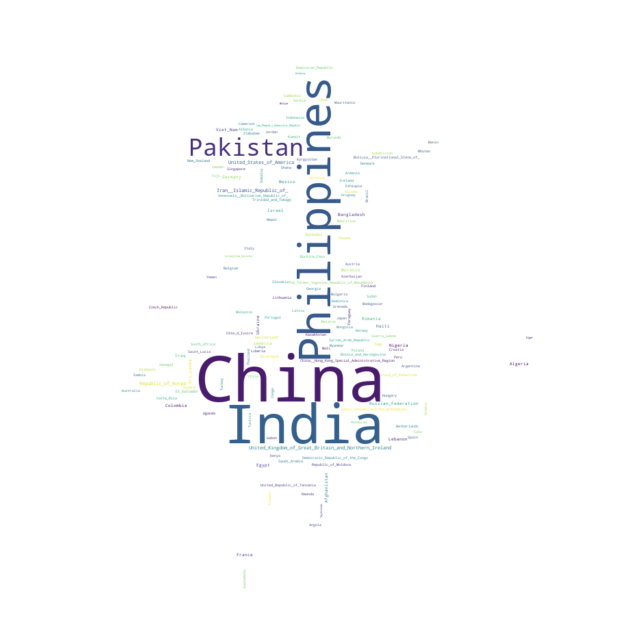

In [52]:
canada_mask = np.array(Image.open('alice_mask.png'))

# membuat Word Cloud
wc = WordCloud(
    background_color="white",
    max_words=2000,
    collocations=False,
    mask = canada_mask
)

wc.generate(canada_2000_2010_textfile) 

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# kita break 10 menit lalu masuk ke regression plots, jam 20.30